### Meta-model templates and their arguments can be instantiated

In [1]:
from mira.metamodel import ControlledConversion, NaturalConversion, Concept

infected = Concept(name='infected population', identifiers={'ido': '0000511'})
susceptible = Concept(name='susceptible population', identifiers={'ido': '0000514'})
immune = Concept(name='immune population', identifiers={'ido': '0000592'})

t1 = ControlledConversion(
    controller=infected,
    subject=susceptible,
    outcome=infected,
)
t2 = NaturalConversion(subject=infected, outcome=immune)

### Templates can be serialized into JSON for exchange and deserialized into objects from JSON

In [2]:
t1.dict()

{'type': 'ControlledConversion',
 'controller': {'name': 'infected population',
  'identifiers': {'ido': '0000511'},
  'context': {}},
 'subject': {'name': 'susceptible population',
  'identifiers': {'ido': '0000514'},
  'context': {}},
 'outcome': {'name': 'infected population',
  'identifiers': {'ido': '0000511'},
  'context': {}},
 'provenance': []}

In [3]:
t1.__class__(**t1.dict())

ControlledConversion(type='ControlledConversion', controller=Concept(name='infected population', identifiers={'ido': '0000511'}, context={}), subject=Concept(name='susceptible population', identifiers={'ido': '0000514'}, context={}), outcome=Concept(name='infected population', identifiers={'ido': '0000511'}, context={}), provenance=[])

### We can define Models using a list of Templates

In [4]:
from mira.modeling import Model

In [5]:
sir_model = Model(templates=[t1, t2])

In [6]:
sir_model

Model(templates=[ControlledConversion(type='ControlledConversion', controller=Concept(name='infected population', identifiers={'ido': '0000511'}, context={}), subject=Concept(name='susceptible population', identifiers={'ido': '0000514'}, context={}), outcome=Concept(name='infected population', identifiers={'ido': '0000511'}, context={}), provenance=[]), NaturalConversion(type='NaturalConversion', subject=Concept(name='infected population', identifiers={'ido': '0000511'}, context={}), outcome=Concept(name='immune population', identifiers={'ido': '0000592'}, context={}), provenance=[])])

### We can easily create other model variants using Templates

COVID-19 outbreak in Wuhan demonstrates the limitations of publicly available case numbers for epidemiological modeling
https://doi.org/10.1016/j.epidem.2021.100439

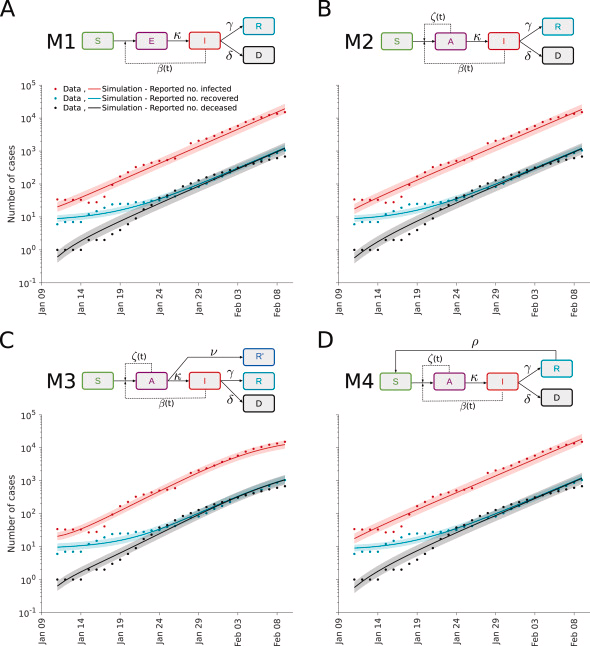

In [7]:
exposed = Concept(name='exposed population', identifiers={'genepio': '0001538'})
deceased = Concept(name='deceased population', identifiers={'ncit': 'C28554'})
s1 = ControlledConversion(
    controller=infected,
    subject=susceptible,
    outcome=exposed
)
s2 = NaturalConversion(
    subject=exposed,
    outcome=infected
)
s3 = NaturalConversion(
    subject=infected,
    outcome=deceased
)

In [8]:
M1 = Model(templates=[s1, s2, s3, t2])

In [9]:
u1 = ControlledConversion(
    controller=exposed,
    subject=susceptible,
    outcome=exposed
)

In [10]:
M2 = Model(templates=M1.templates + [u1])

In [11]:
unreported = Concept(name='immune unreported population', identifiers={'ido': '0000592'},
                     context={'status': 'unreported'})

v1 = NaturalConversion(
    subject=exposed,
    outcome=unreported
)

In [12]:
M3 = Model(templates=M2.templates + [v1])

In [13]:
w1 = NaturalConversion(
    subject=immune,
    outcome=susceptible
)
M4 = Model(templates=M2.templates + [w1])

In [14]:
M4.dict()

{'templates': [{'type': 'ControlledConversion',
   'controller': {'name': 'infected population',
    'identifiers': {'ido': '0000511'},
    'context': {}},
   'subject': {'name': 'susceptible population',
    'identifiers': {'ido': '0000514'},
    'context': {}},
   'outcome': {'name': 'exposed population',
    'identifiers': {'genepio': '0001538'},
    'context': {}},
   'provenance': []},
  {'type': 'NaturalConversion',
   'subject': {'name': 'exposed population',
    'identifiers': {'genepio': '0001538'},
    'context': {}},
   'outcome': {'name': 'infected population',
    'identifiers': {'ido': '0000511'},
    'context': {}},
   'provenance': []},
  {'type': 'NaturalConversion',
   'subject': {'name': 'infected population',
    'identifiers': {'ido': '0000511'},
    'context': {}},
   'outcome': {'name': 'deceased population',
    'identifiers': {'ncit': 'C28554'},
    'context': {}},
   'provenance': []},
  {'type': 'NaturalConversion',
   'subject': {'name': 'infected population